# 02 - EDA
___

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
import time

from nltk.corpus import stopwords
from datetime import datetime
from sklearn.manifold import TSNE

pd.options.display.max_columns = 35

## Word2Vec

In [8]:
# read in our card files
df = pd.read_csv('../Data/cards_cleaned.csv')
df.head()

,object,name,layout,mana_cost,cmc,type_line,oracle_text,colors,color_identity,legalities,rarity,edhrec_rank,power,toughness,card_faces,loyalty,card_type,oracle_text_back,colors_back,power_back,toughness_back,loyalty_back,card_type_back,mana_cost_back
0,card,Static Orb,normal,{3},3.0,Artifact,"As long as Static Orb is untapped, players can...",[],[],"{'standard': 'not_legal', 'future': 'not_legal...",rare,1660.0,NONE,NONE,NONE,NONE,Artifact,NONE,NONE,NONE,NONE,NONE,NONE,NONE
1,card,Sensory Deprivation,normal,{U},1.0,Enchantment — Aura,Enchant creature\nEnchanted creature gets -3/-0.,['U'],['U'],"{'standard': 'not_legal', 'future': 'not_legal...",common,17172.0,NONE,NONE,NONE,NONE,Enchantment,NONE,NONE,NONE,NONE,NONE,NONE,NONE
2,card,Road of Return,normal,{G}{G},2.0,Sorcery,Choose one —\n• Return target permanent card f...,['G'],['G'],"{'standard': 'not_legal', 'future': 'not_legal...",rare,5184.0,NONE,NONE,NONE,NONE,Sorcery,NONE,NONE,NONE,NONE,NONE,NONE,NONE
3,card,Storm Crow,normal,{1}{U},2.0,Creature — Bird,Flying (This creature can't be blocked except ...,['U'],['U'],"{'standard': 'not_legal', 'future': 'not_legal...",common,10016.0,1,2,NONE,NONE,Creature,NONE,NONE,NONE,NONE,NONE,NONE,NONE
4,card,Walking Sponge,normal,{1}{U},2.0,Creature — Sponge,{T}: Target creature loses your choice of flyi...,['U'],['U'],"{'standard': 'not_legal', 'future': 'not_legal...",uncommon,15762.0,1,1,NONE,NONE,Creature,NONE,NONE,NONE,NONE,NONE,NONE,NONE


In [9]:
df.isnull().sum()

object              0
name                0
layout              0
mana_cost           0
cmc                 0
type_line           0
oracle_text         0
colors              0
color_identity      0
legalities          0
rarity              0
edhrec_rank         0
power               0
toughness           0
card_faces          0
loyalty             0
card_type           0
oracle_text_back    0
colors_back         0
power_back          0
toughness_back      0
loyalty_back        0
card_type_back      0
mana_cost_back      0
dtype: int64

In [16]:
# Let's make a list of all the words in our oracle_text
text_list = [text for text in df.loc[df['oracle_text'] != 'NONE']['oracle_text']]
text_list += [text for text in df.loc[df['oracle_text_back'] != 'NONE']['oracle_text_back']]

all_oracle_text = ' '.join(text_list)

len(all_oracle_text)

2591880

In [18]:
import gensim.downloader as api

In [19]:
corpus = api.load('text8')

[==================================================] 100.0% 31.6/31.6MB downloaded


In [32]:
iter(corpus)

<generator object Dataset.__iter__ at 0x1a20ad0318>

In [35]:
all_oracle_text.split()[:10]

['As',
 'long',
 'as',
 'Static',
 'Orb',
 'is',
 'untapped,',
 'players',
 "can't",
 'untap']

In [27]:
print(next(iter(corpus))[:100])

['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working', 'class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english', 'revolution', 'and', 'the', 'sans', 'culottes', 'of', 'the', 'french', 'revolution', 'whilst', 'the', 'term', 'is', 'still', 'used', 'in', 'a', 'pejorative', 'way', 'to', 'describe', 'any', 'act', 'that', 'used', 'violent', 'means', 'to', 'destroy', 'the', 'organization', 'of', 'society', 'it', 'has', 'also', 'been', 'taken', 'up', 'as', 'a', 'positive', 'label', 'by', 'self', 'defined', 'anarchists', 'the', 'word', 'anarchism', 'is', 'derived', 'from', 'the', 'greek', 'without', 'archons', 'ruler', 'chief', 'king', 'anarchism', 'as', 'a', 'political', 'philosophy', 'is', 'the', 'belief', 'that', 'rulers', 'are', 'unnecessary', 'and', 'should', 'be', 'abolished', 'although', 'there', 'are', 'differing']


In [33]:
from gensim.models.word2vec import Word2Vec
Word2Vec()

In [38]:
# Import Word2Vec
from gensim.models.word2vec import Word2Vec

# # If you want to use gensim's data, import their downloader
# # and load it.
# import gensim.downloader as api
# corpus = api.load('text8')

# If you have your own iterable corpus of cleaned data, you can 
# read it in as corpus and pass that in.

# Train a model! 
model = Word2Vec([all_oracle_text.split()],      # Corpus of data.
                 size=100,    # How many dimensions do you want in your word vector?
                 window=5,    # How many "context words" do you want?
                 min_count=1, # Ignores words below this threshold.
                 sg=0,        # SG = 1 uses SkipGram, SG = 0 uses CBOW (default).
                 workers=4)   # Number of "worker threads" to use (parallelizes process).

In [39]:
# Do what you'd like to do with your dataa!
model.most_similar("target")

/Users/Creighton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('of', 0.9999127388000488),
 ('creature', 0.9999021887779236),
 ('When', 0.999901294708252),
 ('a', 0.9998939037322998),
 ('the', 0.9998931884765625),
 ('each', 0.9998877048492432),
 ('gets', 0.9998860359191895),
 ('to', 0.999881386756897),
 ('you', 0.9998800754547119),
 ('this', 0.999873697757721)]

In [40]:
model['target']

/Users/Creighton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.02909455,  0.1542251 , -0.12231514, -0.43993253,  0.36022255,
        0.35914186,  0.14355235,  0.37475193, -0.03701775, -0.11996467,
        0.15945975, -0.13656999, -0.18371852,  0.5438802 , -0.01828972,
        0.270107  , -0.4344153 , -0.25742638, -0.45163885, -0.03717998,
        0.13496351, -0.22151104,  0.2571906 ,  0.5597642 , -0.0791301 ,
       -0.01697458,  0.1828046 , -0.4473337 , -0.27968034, -0.00768711,
        0.17935467, -0.39673635,  0.63595396,  0.26414445, -0.35120744,
        0.3024486 ,  0.12170903,  0.37381107, -0.3100971 , -0.48015106,
       -0.20801325, -0.16611363, -0.22862417,  0.16570266,  0.26396134,
        0.188906  ,  0.11878309, -0.65546185, -0.30811483, -0.28108755,
        0.17457756, -0.07823837,  0.31525552, -0.08163022, -0.16242634,
        0.18844375,  0.09126243,  0.40587962, -0.2047911 , -0.09300079,
       -0.2297239 ,  0.02247703, -0.07068972, -0.02685292, -0.8567881 ,
        0.736096  ,  0.2144938 ,  0.29685107, -0.2553122 , -0.22

In [47]:
model.vocabulary

In [48]:
# now let's get a list of the vectors for each word in our oracle text
word_vec = [model[word] for word in all_oracle_text.split()]

/Users/Creighton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [49]:
# now let's make a dataframe for our oracle text words and their corresponding vectors
w2vdf = pd.DataFrame.from_dict(dict(zip(all_oracle_text.split(), word_vec))).T
w2vdf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
As,0.005005,0.065838,-0.052861,-0.190014,0.154936,0.158402,0.068096,0.161659,-0.017153,-0.053557,0.070522,-0.057404,-0.079012,0.232680,-0.002633,0.114438,-0.185935,...,0.173571,-0.127443,0.058249,-0.098860,-0.139183,-0.079301,-0.188092,0.046671,-0.159186,0.276403,-0.123616,-0.235591,0.359858,0.039648,0.093046,0.157916,0.058921
long,0.006202,0.067571,-0.064389,-0.214383,0.176727,0.169108,0.067256,0.170828,-0.016040,-0.051395,0.071171,-0.059667,-0.088516,0.262267,-0.012870,0.137759,-0.212481,...,0.193023,-0.136361,0.067223,-0.107139,-0.151822,-0.090419,-0.207023,0.043016,-0.176981,0.302500,-0.132567,-0.260088,0.396553,0.052541,0.112635,0.164778,0.063945
as,0.009854,0.099058,-0.076961,-0.286052,0.238862,0.245770,0.098172,0.245046,-0.028622,-0.081298,0.109915,-0.083162,-0.119858,0.359332,-0.007397,0.177612,-0.286995,...,0.260094,-0.191530,0.093317,-0.150212,-0.212897,-0.119641,-0.288970,0.063335,-0.245927,0.425731,-0.188878,-0.359869,0.547637,0.073183,0.154036,0.241521,0.091377
Static,0.002101,0.000520,-0.002593,-0.008252,0.003929,0.008300,-0.002072,0.001717,-0.002544,-0.004264,-0.003157,-0.001151,-0.004473,0.008484,0.000830,0.001088,-0.000377,...,0.001330,-0.005502,0.004486,-0.005591,-0.005135,0.000218,-0.008600,0.003486,-0.005424,0.003939,-0.005439,-0.005521,0.005653,0.004343,0.006008,0.002955,-0.000016
Orb,0.001049,-0.002324,0.002142,-0.006498,0.000810,0.002733,0.000057,0.005399,0.000283,0.001447,0.003586,0.001694,0.000081,0.001746,0.004255,0.007252,-0.006502,...,0.002089,-0.000473,0.000852,0.001331,-0.005643,-0.006672,-0.002701,0.002595,-0.006884,0.006355,-0.002888,-0.007494,0.006909,0.000155,0.000550,0.006064,0.004344


In [51]:
w2vdf.shape

(13652, 100)

In [50]:
t0 = time.time()

# Initialize t-SNE
tsne = TSNE(random_state = 42, perplexity = 175)

tsne_df = tsne.fit_transform(w2vdf)

print(time.time() - t0)

693.7163519859314


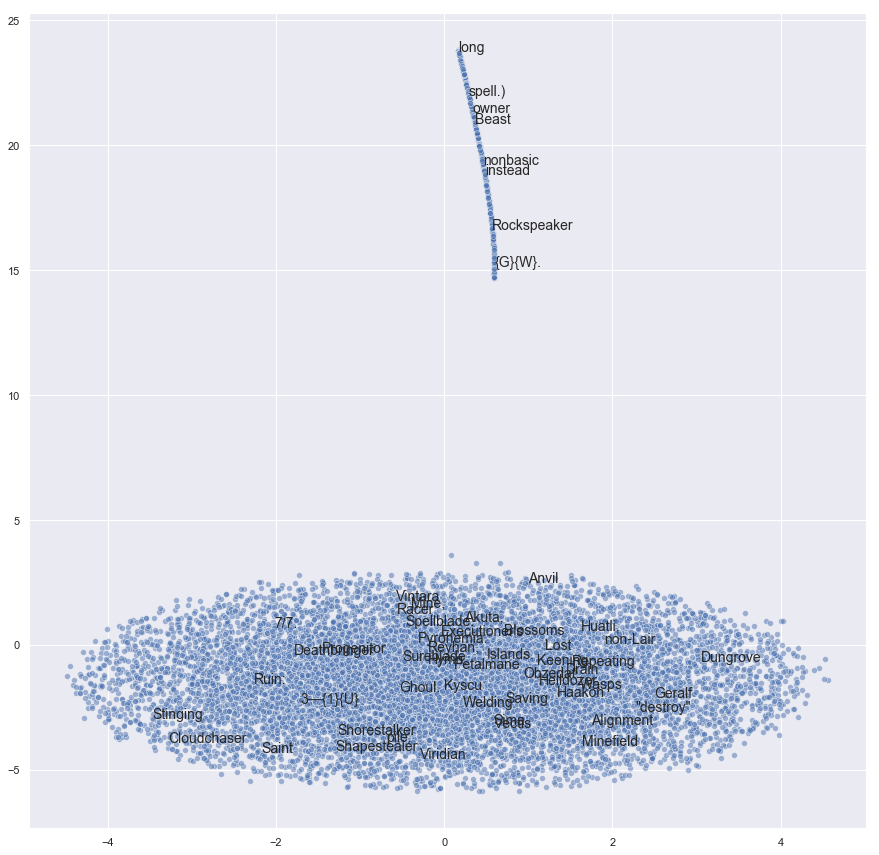

In [52]:
sns.set()
# Initialize figure
fig, ax = plt.subplots(figsize = (15, 15))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# initialize list of texts
texts = []
words_to_plot = list(np.arange(1, 13652, 250))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], w2vdf.index[word], fontsize = 14))
    